# <center>Python for data analysis</center>
## <center>Final project | SkillCraft</center>  

------

SkillCraft is a dataset composed of a lot of features of over three thousand players playing at StarCraft 2 from bronze to professionnal gamers. In ower study we will try to predict the league index of a player concidering all his others features.

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np

# Data Exploration

## First step

### Import data

In [121]:
dataset = pd.read_csv("SkillCraft1_Dataset.csv", index_col="GameID")
dataset.sort_index(inplace=True)
dataset.head()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
GameID,,,,,,,,,,,,,,,,,,,
52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


### Have a look on the types of the columns

In [122]:
dataset.dtypes

LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

- We see here that some variables are continuous and others are discret? Moreover, Age, HoursPerWeek and TotalHours are objects. It can be a sign of missed values

### Check the range / mean / std... of each features

In [123]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
LeagueIndex,3395.0,4.184094,1.517327,1.000000,3.000000,4.000000,5.000000,8.000000
APM,3395.0,117.046947,51.945291,22.059600,79.900200,108.010200,142.790400,389.831400
SelectByHotkeys,3395.0,0.004299,0.005284,0.000000,0.001258,0.002500,0.005133,0.043088
AssignToHotkeys,3395.0,0.000374,0.000225,0.000000,0.000204,0.000353,0.000499,0.001752
UniqueHotkeys,3395.0,4.364654,2.360333,0.000000,3.000000,4.000000,6.000000,10.000000
MinimapAttacks,3395.0,0.000098,0.000166,0.000000,0.000000,0.000040,0.000119,0.003019
MinimapRightClicks,3395.0,0.000387,0.000377,0.000000,0.000140,0.000281,0.000514,0.004041
NumberOfPACs,3395.0,0.003463,0.000992,0.000679,0.002754,0.003395,0.004027,0.007971
GapBetweenPACs,3395.0,40.361562,17.153570,6.666700,28.957750,36.723500,48.290500,237.142900
ActionLatency,3395.0,63.739403,19.238869,24.093600,50.446600,60.931800,73.681300,176.372100


- We can see that our target LeagueIndex is an int between 1 (beginner) and 8 (professional). Thus a middle player would have a league index of 4. 

### Quality of values

- Let's have a look on missed values / NA / 0 etc..

In [124]:
dataset.isnull()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
GameID,,,,,,,,,,,,,,,,,,,
52,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
55,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
56,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
57,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
58,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10089,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10090,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10092,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


- It seems to not have any NAN values. But as said early it seems to have a problem with the variables Age, HoursPerWeek and TotalHours. Let's check this.

In [125]:
dataset[['Age', 'HoursPerWeek', 'TotalHours']]

,Age,HoursPerWeek,TotalHours
GameID,,,
52,27,10,3000
55,23,10,5000
56,30,10,200
57,19,20,400
58,32,10,500
...,...,...,...
10089,?,?,?
10090,?,?,?
10092,?,?,?


- Missed values seems to been encoded with '?'

In [126]:
dataset[dataset=='?'].count()

LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64

- We choose to delete these lines because there are only few and it will not impact the futurs models.

In [141]:
#Drop
index_to_drop = dataset[dataset=='?'].dropna(how = 'all').index
dataset.drop(index_to_drop, inplace = True)

#update the type
dataset = dataset.astype({'Age':int, 'HoursPerWeek':int, 'TotalHours':int} )

### Final check

In [142]:
dataset[dataset=='?'].count()

LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

In [143]:
dataset.dtypes

LeagueIndex               int64
Age                       int32
HoursPerWeek              int32
TotalHours                int32
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

- Alright ! We are ready to start !

## Overview plots

### Histogramm

array([[<AxesSubplot:title={'center':'LeagueIndex'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'HoursPerWeek'}>,
        <AxesSubplot:title={'center':'TotalHours'}>],
       [<AxesSubplot:title={'center':'APM'}>,
        <AxesSubplot:title={'center':'SelectByHotkeys'}>,
        <AxesSubplot:title={'center':'AssignToHotkeys'}>,
        <AxesSubplot:title={'center':'UniqueHotkeys'}>],
       [<AxesSubplot:title={'center':'MinimapAttacks'}>,
        <AxesSubplot:title={'center':'MinimapRightClicks'}>,
        <AxesSubplot:title={'center':'NumberOfPACs'}>,
        <AxesSubplot:title={'center':'GapBetweenPACs'}>],
       [<AxesSubplot:title={'center':'ActionLatency'}>,
        <AxesSubplot:title={'center':'ActionsInPAC'}>,
        <AxesSubplot:title={'center':'TotalMapExplored'}>,
        <AxesSubplot:title={'center':'WorkersMade'}>],
       [<AxesSubplot:title={'center':'UniqueUnitsMade'}>,
        <AxesSubplot:title={'center':'ComplexUnitsMade'}>,

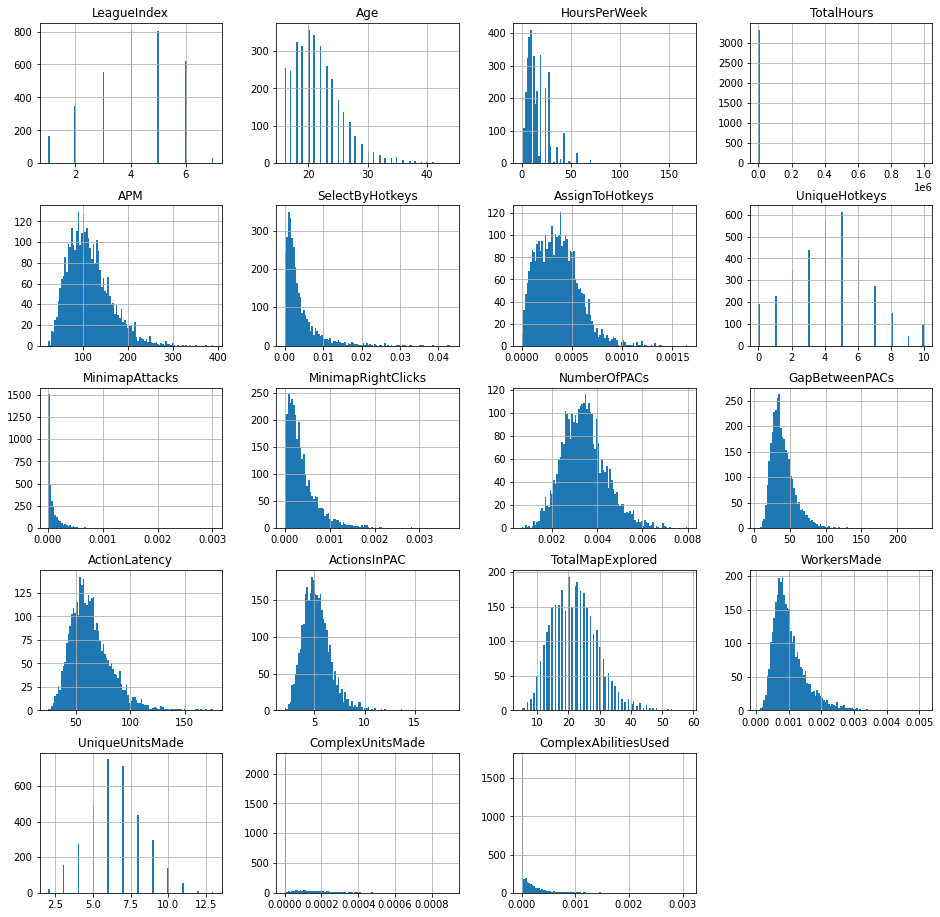

In [147]:
dataset.hist(bins=100, figsize=(16, 16))

In [145]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

NameError: name 'sns' is not defined

<Figure size 720x720 with 0 Axes>

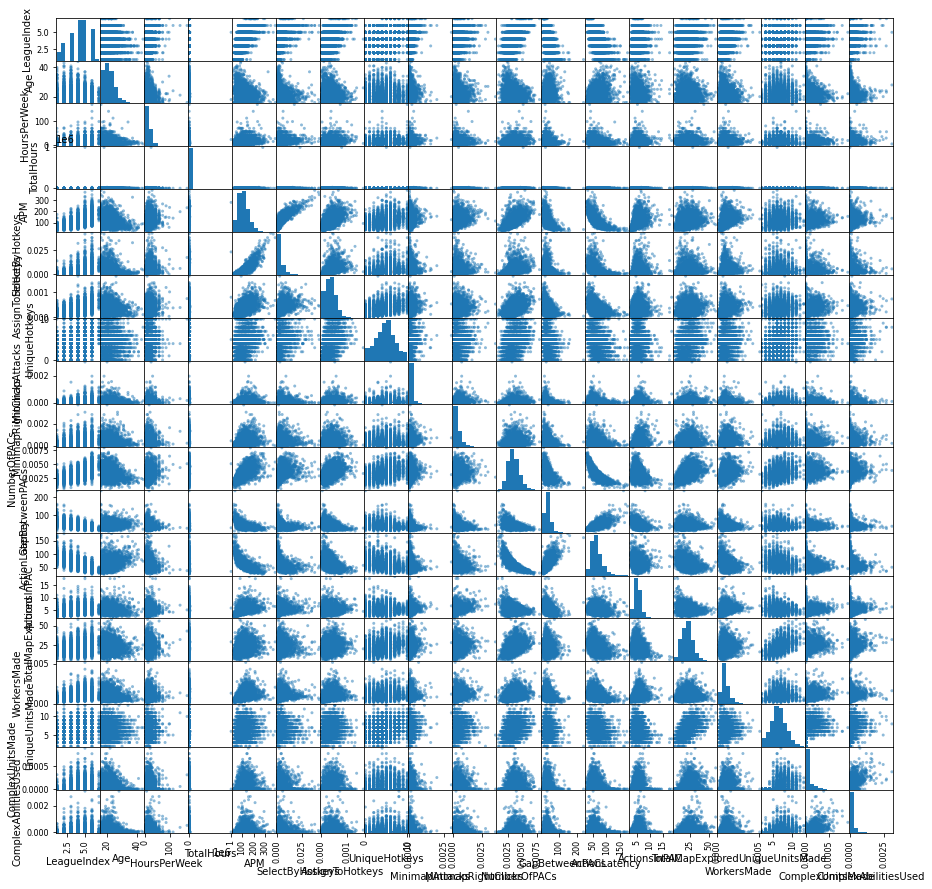

In [146]:
infos = pd.plotting.scatter_matrix(dataset, figsize=(15,15))